Rješenje trećeg zadatka

Nad točkama grafa radimo. Kreiramo matricu povezanosti za taj graf.
Kreiramo matricu udaljenosti koristeći matricu povezanosti. Na dijagonali su 0, matrica je simetrična. 

In [1]:
import math
import random
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import math
import random

import pandas as pd 
import numpy as np

In [77]:
def d(x,y):
    s = 0
    for i in range(len(x)):
        s += (x[i]-y[i])**2
    return math.sqrt(s)

def teziste(vektori):
    t=[]
    for i in range(len(vektori[0])):
        t.append(0)
    for v in vektori:
        for i in range(len(v)):
            t[i]+=v[i]
    for i in range(len(t)):
        t[i]=t[i]/float(len(vektori))
    return t

def kugla(vektori, teziste, radius): 
    rez=[]
    for v in vektori:
        if d(v,teziste)<radius:
            rez.append(v)
    return rez

def najveci_r(vektori, centar):
    a=0
    for v in vektori:
        if d(v,centar)>a:
            a=d(v,centar)
    return a


def getBestBall(R, vektori):
    tempVektori=vektori[:]
    r=1
    i=0
    npoints_in_ball = []
    nradius_in_ball = []
    while r>R:
        t=teziste(tempVektori)
        tempVektori=kugla(vektori, t, r)
        npoints_in_ball.append(len(tempVektori))
        nradius_in_ball.append(r)
        r=r*0.99

    #npoints_in_ball = len(tempVektori)
    nradius_in_ball.pop(0)
    return tempVektori,npoints_in_ball,nradius_in_ball

def incidence_matrix(n, k):
    im=[]
    tmp = []
    
    for i in range(n):
        tmp.append(0)

    for i in range(n):
        im.append(tmp[:])

    for i in range(k): #radim kliku
        for j in range(k):
            im[i][j]=1

    for i in range(n):
        im[i][i]=1
    
    return im
    

def distance_matrix(incidence_matrix):
    n = len(incidence_matrix)
    
    tmp=[]
    for i in range(n):
        tmp.append(0)

    dm=[] 
    for i in range(n):
        dm.append(tmp[:])

    for i in range(n):
        for j in range(i,n):
            a = random.random()
            dm[i][j] = math.exp(-5*incidence_matrix[i][j])+a*1/20
            dm[j][i] = dm[i][j]
    
    for i in range(n):
        dm[i][i]=0
    
    return dm


In [78]:
n = 100 #broj vrhova/vektora, dimenzija kvadrate matrice incidence
k = 9 #dimenzija klike, odnosno broj povezanih vrhova, klika će nam biti u gornjem lijevom kutu
n_new = 2

#create incidence and distance
IN_MATRIX = incidence_matrix(n, k)
DIS_MATRIX = distance_matrix(IN_MATRIX)

#pd.DataFrame(DIS_MATRIX) 

In [79]:
my_MDS = MDS(n_components= 2,  dissimilarity= "precomputed") 
new_points = my_MDS.fit_transform(DIS_MATRIX) #dobijemo 100 parova tocaka u 2D -> ulaganjem n dim prostora u prostor dimenzije n_new

in_ball,npoints, nradius = getBestBall(0.2, new_points)
in_ball = np.array(in_ball)

9

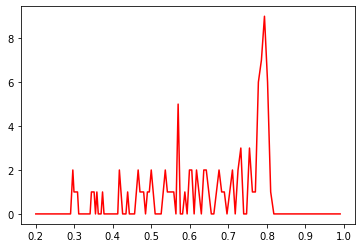

In [86]:
plt.plot(nradius, abs(np.diff(npoints)), color="red")


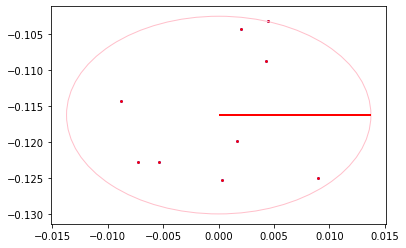

In [38]:
#vizualizacija klike
fig, ax = plt.subplots()

plt.scatter(new_points[0:k,0], new_points[0:k,1], color = "blue", s = 3)
#plt.scatter(new_points[k:100,0], new_points[k:100,1], color="yellow")
plt.scatter(in_ball[:, 0], in_ball[:, 1], color="red", s = 3)

 

my_circle = plt.Circle(t, 0.1, color="green", fill = False)
my_circle2 = plt.Circle(t, my_R, color="pink", fill = False)

#ax.add_patch(my_circle)
ax.add_patch(my_circle2)


ax.hlines(y=t[1], xmin=t[0], xmax=t[0] + my_R, linewidth=2, color='r')

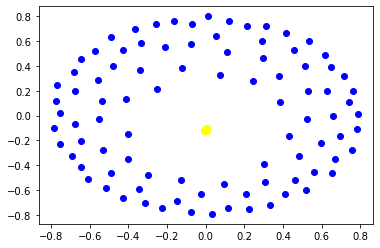

In [43]:
plt.scatter(new_points[0:k,0], new_points[0:k,1], color = "yellow") #drugom bojom označimo kliku kako bismo je lakše uočili
plt.scatter(new_points[k:100,0], new_points[k:100,1], color="blue") 

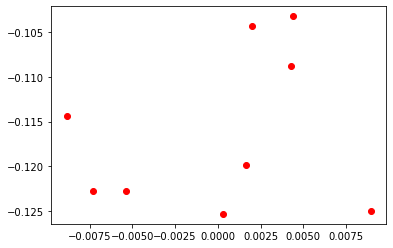

In [45]:
plt.scatter(in_ball[:, 0], in_ball[:, 1], color="red")